# Regressão

Em regressão, queremos prever um valor contínuo, como o preço de um imóvel, a altura de uma pessoa, a receita de um jogo no primeiro mês de lançamento e etc.

Basicamente todas as técnicas estudadas até aqui de cross-validation, otimização de hiperparâmetros e feature selection, também servem para problemas de regressão.

A grande diferença entre regressão e classificação é o tipo de dados que queremos prever e as métricas utilizadas para avaliarmos a performance.

Iremos usar o dataset de previsão de preços de casas disponível no kaggle ([House Prices: Advanced Regression Tecniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)).

Sugiro fortemente como leitura complementar explorar os notebooks dessa competição e aprender com os competidores e quem sabe até participar da competição!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lendo os Dados

In [2]:
import os
import numpy as np
import pandas as pd

df_train = pd.read_csv('/content/drive/MyDrive/datasets/house_prices.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Análise Exploratória

In [3]:
df_train.shape

(1460, 81)

A base tem 81 colunas e 1460 linhas. Cada linha representa uma casa.

In [4]:
df_train['Id'].nunique()

1460

Devemos remover a coluna `Id` da modelagem, pois é apenas uma chave identificadora.

In [5]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Como não temos números negativos nas variáveis numéricas, iremos substituir os valores faltantes nessas variáveis pelo valor arbitrário -999. Já para as variáveis categóricas, iremos substituir os missing values pela palavra `missing`.

In [8]:
target = 'SalePrice'
cat_vars = df_train.select_dtypes(include='object').columns.to_list()
num_vars = [col for col in df_train.columns if col not in cat_vars + ['Id', target]]

In [9]:
X = df_train.filter(cat_vars + num_vars).copy()
y = df_train[target].copy()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

# Feature Engineering

In [11]:
!pip install feature-engine catboost lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [12]:
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data_tree_pipe = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(imputation_method='median', variables=num_vars)),
    ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
])

data_linear_pipe = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=num_vars)),
    ('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars)),
    ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars, return_object=True)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars))
])

In [13]:
data_tree_pipe.fit_transform(X_train).head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_CWD,SaleType_Oth,SaleType_ConLw,SaleType_Con,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_Abnorml,SaleCondition_AdjLand
327,20,80.0,11600,6,5,1960,1960,175.0,565,0,...,0,0,0,0,1,0,0,0,0,0
1061,30,120.0,18000,3,4,1935,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
161,60,110.0,13688,9,5,2003,2004,664.0,1016,0,...,0,0,0,0,1,0,0,0,0,0
109,20,105.0,11751,6,6,1977,1977,480.0,705,0,...,0,0,0,0,1,0,0,0,0,0
973,20,95.0,11639,7,5,2007,2008,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
data_linear_pipe.fit_transform(X_train).head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_CWD,SaleType_Oth,SaleType_ConLw,SaleType_Con,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_Abnorml,SaleCondition_AdjLand
327,-0.88486,0.480871,0.173508,-0.049542,-0.527116,-0.348867,-1.192308,0.411360,0.284286,-0.283665,...,0,0,0,0,1,0,0,0,0,0
1061,-0.64727,2.290626,0.952620,-2.219468,-1.415531,-1.171852,-1.676511,-0.563820,-0.953881,-0.283665,...,0,0,0,0,1,0,0,0,0,0
161,0.06550,1.838187,0.427693,2.120384,-0.527116,1.066668,0.938185,3.136292,1.272628,-0.283665,...,0,0,0,0,1,0,0,0,0,0
109,-0.88486,1.611968,0.191890,-0.049542,0.361299,0.210763,-0.369163,2.110960,0.591088,-0.283665,...,0,0,0,0,1,0,0,0,0,0
973,-0.88486,1.159529,0.178256,0.673767,-0.527116,1.198346,1.131866,-0.563820,-0.953881,-0.283665,...,0,0,0,0,0,1,0,0,0,0


# Model Training

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [16]:
models = [
    ('ridge_reg', Ridge(random_state=42)),
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('lgbm', LGBMRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42)),
    ('catboost', CatBoostRegressor(random_state=42))
]

In [17]:
# Para visualizer as métricas disponíveis para o cross_val_score
import sklearn
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# definindo a estratégia de validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# definindo a lista de métricas utilizadas
metricas = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

# criando um dicionário irá conter os resultados dos modelos
dicionario_resultados = {'model': [], 'r2': [], 'mae': [], 'rmse': []}

# treinando e avaliando todos os modelos que estão na lista `models`
for model in models:
    model_pipe = Pipeline(steps=data_tree_pipe.steps + [model])

    cv_results = cross_validate(estimator=model_pipe, X=X_train, y=y_train, scoring=metricas, cv=kfold, n_jobs=-1)
    cv_results_df = pd.DataFrame(cv_results)

    r2 = cv_results_df.mean().loc['test_r2']
    mae = np.abs(cv_results_df.mean().loc['test_neg_mean_absolute_error'])
    rmse = np.abs(cv_results_df.mean().loc['test_neg_root_mean_squared_error'])

    # populando a tabela com os resultados
    dicionario_resultados['model'].append(model_pipe.steps[-1][0])
    dicionario_resultados['r2'].append(r2)
    dicionario_resultados['mae'].append(mae)
    dicionario_resultados['rmse'].append(rmse)

df_resultados = pd.DataFrame(dicionario_resultados)

In [19]:
pd.options.display.float_format = '{:.4f}'.format
df_resultados.sort_values(by='mae')

,model,r2,mae,rmse
5,catboost,0.8872,14849.9661,25591.5011
3,lgbm,0.8685,16520.8701,27646.3522
2,random_forest,0.8451,17701.2672,30008.9376
4,xgb,0.8487,18365.6630,29721.2138
0,ridge_reg,0.7786,18969.9723,34816.8260
1,decision_tree,0.6789,26583.9180,43004.1559


# Visualizando as Predições

In [20]:
best_model = Pipeline(data_tree_pipe.steps + [('catboost', CatBoostRegressor(random_state=42))])

best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)

Learning rate set to 0.04196
0:	learn: 74923.8099510	total: 65.2ms	remaining: 1m 5s
1:	learn: 72997.3203489	total: 72.8ms	remaining: 36.3s
2:	learn: 71167.4970008	total: 79.1ms	remaining: 26.3s
3:	learn: 69411.1003040	total: 84.3ms	remaining: 21s
4:	learn: 67785.0324778	total: 89.5ms	remaining: 17.8s
5:	learn: 66242.2274047	total: 96.2ms	remaining: 15.9s
6:	learn: 64587.6247035	total: 102ms	remaining: 14.5s
7:	learn: 63063.0197898	total: 108ms	remaining: 13.4s
8:	learn: 61454.3002510	total: 114ms	remaining: 12.5s
9:	learn: 60015.5053198	total: 120ms	remaining: 11.8s
10:	learn: 58689.5638954	total: 129ms	remaining: 11.6s
11:	learn: 57439.4682998	total: 134ms	remaining: 11s
12:	learn: 56151.6340472	total: 139ms	remaining: 10.6s
13:	learn: 54880.0207439	total: 144ms	remaining: 10.2s
14:	learn: 53684.3354066	total: 150ms	remaining: 9.84s
15:	learn: 52565.4126192	total: 157ms	remaining: 9.67s
16:	learn: 51428.8509940	total: 163ms	remaining: 9.41s
17:	learn: 50441.7053797	total: 168ms	remain

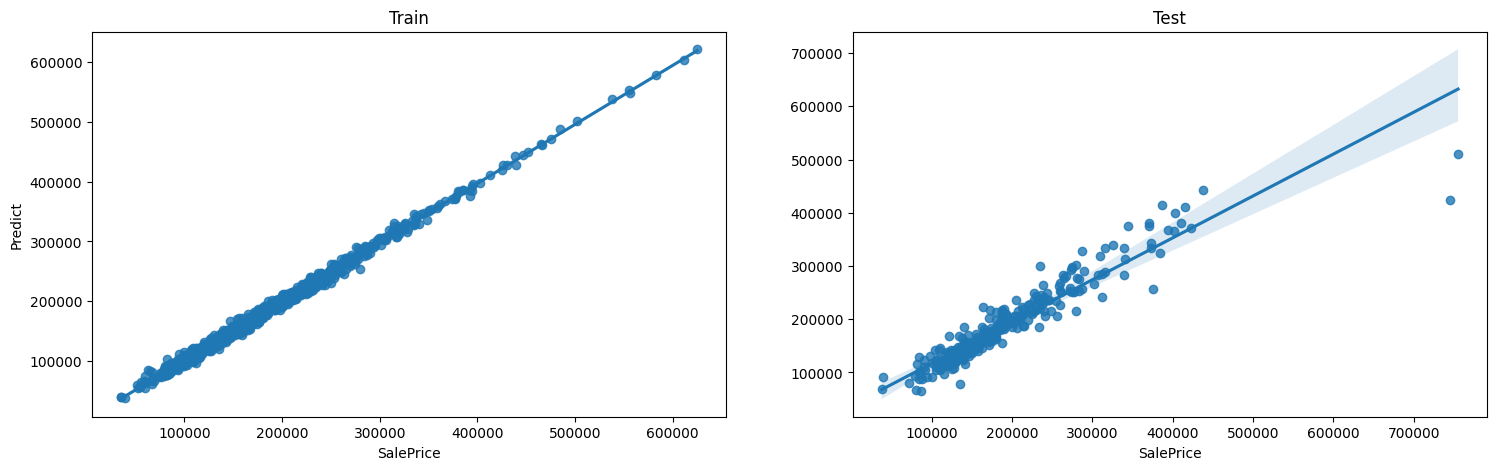

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
sns.regplot(x=y_train, y=y_pred_train, ax=ax[0])
sns.regplot(x=y_test, y=y_pred_test, ax=ax[1])
ax[0].set_ylabel('Predict')
ax[0].set_title('Train')
ax[1].set_title('Test');

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error


def adjusted_r2(y_esperado, y_previsto, X_treino):
  R2 = r2_score(y_esperado, y_previsto)
  N = len(y_esperado)
  p = X_treino.shape[1]

  r2_ajustado = (1 - ((1 - R2) * (N - 1)) / (N - p - 1))
  return r2_ajustado

r2_ajustado = adjusted_r2(y_test, y_pred_test, X_train)
print('R2 Ajustado:', r2_ajustado)
print()
mae = mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred_test)
print('MSE:', mse)

rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('RMSE:', rmse)

rmsle = mean_squared_log_error(y_test, y_pred_test, squared=False)
print('RMSLE:', rmsle)
print()
m_error = max_error(y_test, y_pred_test)
print('Max Error:', m_error)

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print('MAPE:', mape)


R2 Ajustado: 0.8263916949010288

MAE: 16250.11269957932
MSE: 983098131.2858518
RMSE: 31354.39572509494
RMSLE: 0.1316093439240351

Max Error: 321571.4398654181
MAPE: 0.08867528692229257


# Feature Selection

In [23]:
from feature_engine.selection import SelectByShuffling

X_train_transformed = data_tree_pipe.fit_transform(X_train)
X_test_transformed  = data_tree_pipe.transform(X_test)

shuffle = SelectByShuffling(estimator=CatBoostRegressor(), scoring='neg_mean_absolute_error', cv=5)

shuffle.fit(X_train_transformed, y_train)

print(f"Qtde de variáveis antes da remoção: {X_train_transformed.shape[1]}")
print(f"Qtde de variáveis a serem removidas: {len(shuffle.features_to_drop_)}")
print(f"Qtde de variáveis depois da remoção: {X_train_transformed.shape[1] - len(shuffle.features_to_drop_)}")

X_train_transformed_reduzido = shuffle.transform(X_train_transformed)
X_test_transformed_reduzido  = shuffle.transform(X_test_transformed)

catboost = CatBoostRegressor(random_state=42)

catboost.fit(X_train_transformed_reduzido, y_train)

y_pred_train = catboost.predict(X_train_transformed_reduzido)
y_pred_test  = catboost.predict(X_test_transformed_reduzido)

A saída de streaming foi truncada nas últimas 5000 linhas.
7:	learn: 63910.1862555	total: 46.5ms	remaining: 5.77s
8:	learn: 62439.1274690	total: 52ms	remaining: 5.73s
9:	learn: 61079.2786263	total: 57.3ms	remaining: 5.67s
10:	learn: 59651.0078926	total: 62.9ms	remaining: 5.65s
11:	learn: 58384.1954824	total: 68.2ms	remaining: 5.61s
12:	learn: 57004.8212608	total: 73.6ms	remaining: 5.58s
13:	learn: 55842.2755744	total: 78.8ms	remaining: 5.55s
14:	learn: 54670.8684405	total: 84.1ms	remaining: 5.52s
15:	learn: 53621.3202006	total: 89.5ms	remaining: 5.5s
16:	learn: 52463.7869581	total: 95ms	remaining: 5.49s
17:	learn: 51351.4252915	total: 100ms	remaining: 5.47s
18:	learn: 50418.3151260	total: 106ms	remaining: 5.45s
19:	learn: 49484.8493609	total: 111ms	remaining: 5.45s
20:	learn: 48528.1619935	total: 117ms	remaining: 5.43s
21:	learn: 47650.1283223	total: 122ms	remaining: 5.42s
22:	learn: 46867.2902578	total: 127ms	remaining: 5.41s
23:	learn: 45983.5427195	total: 133ms	remaining: 5.4s
24:	l

In [24]:
r2_ajustado = adjusted_r2(y_test, y_pred_test, X_train)
print('R2 Ajustado:', r2_ajustado)
print()
mae = mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred_test)
print('MSE:', mse)

rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('RMSE:', rmse)

rmsle = mean_squared_log_error(y_test, y_pred_test, squared=False)
print('RMSLE:', rmsle)
print()
m_error = max_error(y_test, y_pred_test)
print('Max Error:', m_error)

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print('MAPE:', mape)

R2 Ajustado: 0.797088971016138

MAE: 17597.924653624777
MSE: 1149031743.0240629
RMSE: 33897.37073910103
RMSLE: 0.14026726311553775

Max Error: 324745.6258273963
MAPE: 0.09486086216956498
